<a href="https://colab.research.google.com/github/okayhrm/wineqt-prediction/blob/main/wineqtmlmodels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
df =pd.read_excel('/content/drive/MyDrive/WineQT.xlsx')

In [4]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [6]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
Id                        int64
dtype: object

In [7]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

In [8]:
df.isnull()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,False,False,False,False,False,False,False,False,False,False,False,False,False
1139,False,False,False,False,False,False,False,False,False,False,False,False,False
1140,False,False,False,False,False,False,False,False,False,False,False,False,False
1141,False,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
X=df.drop(columns='quality',axis=1)
y=df['quality']
X

0       5
1       5
2       5
3       6
4       5
       ..
1138    6
1139    6
1140    5
1141    6
1142    5
Name: quality, Length: 1143, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.3)
ridge.fit(X_train, y_train)
y_pred_r= ridge.predict(X_test)

In [ ]:
ridge_p=y_pred_r
ridge_p

In [24]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.2)
lasso.fit(X_train, y_train)
y_pred_l = lasso.predict(X_test)

In [25]:
lasso_p=y_pred_l

In [31]:
from sklearn.metrics import mean_squared_error, r2_score
ridge_mse = mean_squared_error(y_test, ridge_p)
ridge_rmse = np.sqrt(mean_squared_error(y_test, y_pred_r))
ridge_r2 = r2_score(y_test, y_pred_r)
print("Ridge Regression MSE:", ridge_mse)
print("Ridge Regression RMSE:", ridge_rmse)
print("Ridge Regression R^2:", ridge_r2)
lasso_rmse = np.sqrt(mean_squared_error(y_test, y_pred_l))
lasso_r2 = r2_score(y_test, y_pred_l)
lasso_mse = mean_squared_error(y_test, lasso_p)
print("Lasso Regression MSE:", lasso_mse)
print("Lasso Regression RMSE:", lasso_rmse)
print("Lasso Regression R^2:", lasso_r2)

Ridge Regression MSE: 0.3954060705306841
Ridge Regression RMSE: 0.6287851112186145
Ridge Regression R^2: 0.3837345225750072
Lasso Regression MSE: 0.6421530318984146
Lasso Regression RMSE: 0.8013445151109568
Lasso Regression R^2: -0.0009257860475793134


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
from sklearn.tree import DecisionTreeRegressor
model= DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [34]:
decision_tree_model = DecisionTreeRegressor()
decision_tree_model.fit(X_train, y_train)
decision_tree_predictions = decision_tree_model.predict(X_test)


In [35]:
dt_mse = mean_squared_error(y_test, decision_tree_predictions)
dt_r2 = r2_score(y_test, decision_tree_predictions)

In [41]:
dt_r2

-0.0705771187672628

In [40]:
dt_mse


0.7202797202797203

In [36]:
y_pred = model.predict(X_test)

[Text(0.5352858040201005, 0.9705882352941176, 'x[10] <= 10.525\nsquared_error = 0.641\nsamples = 857\nvalue = 5.657'),
 Text(0.3196608040201005, 0.9117647058823529, 'x[9] <= 0.625\nsquared_error = 0.435\nsamples = 532\nvalue = 5.38'),
 Text(0.20967336683417084, 0.8529411764705882, 'x[7] <= 1.001\nsquared_error = 0.311\nsamples = 326\nvalue = 5.218'),
 Text(0.20565326633165829, 0.7941176470588235, 'x[1] <= 0.832\nsquared_error = 0.297\nsamples = 325\nvalue = 5.225'),
 Text(0.13090452261306532, 0.7352941176470589, 'x[10] <= 9.45\nsquared_error = 0.263\nsamples = 294\nvalue = 5.265'),
 Text(0.05226130653266332, 0.6764705882352942, 'x[9] <= 0.555\nsquared_error = 0.195\nsamples = 95\nvalue = 5.126'),
 Text(0.02613065326633166, 0.6176470588235294, 'x[11] <= 176.5\nsquared_error = 0.106\nsamples = 47\nvalue = 4.979'),
 Text(0.016080402010050253, 0.5588235294117647, 'x[5] <= 16.0\nsquared_error = 0.168\nsamples = 14\nvalue = 4.786'),
 Text(0.008040201005025126, 0.5, 'x[2] <= 0.255\nsquared_er

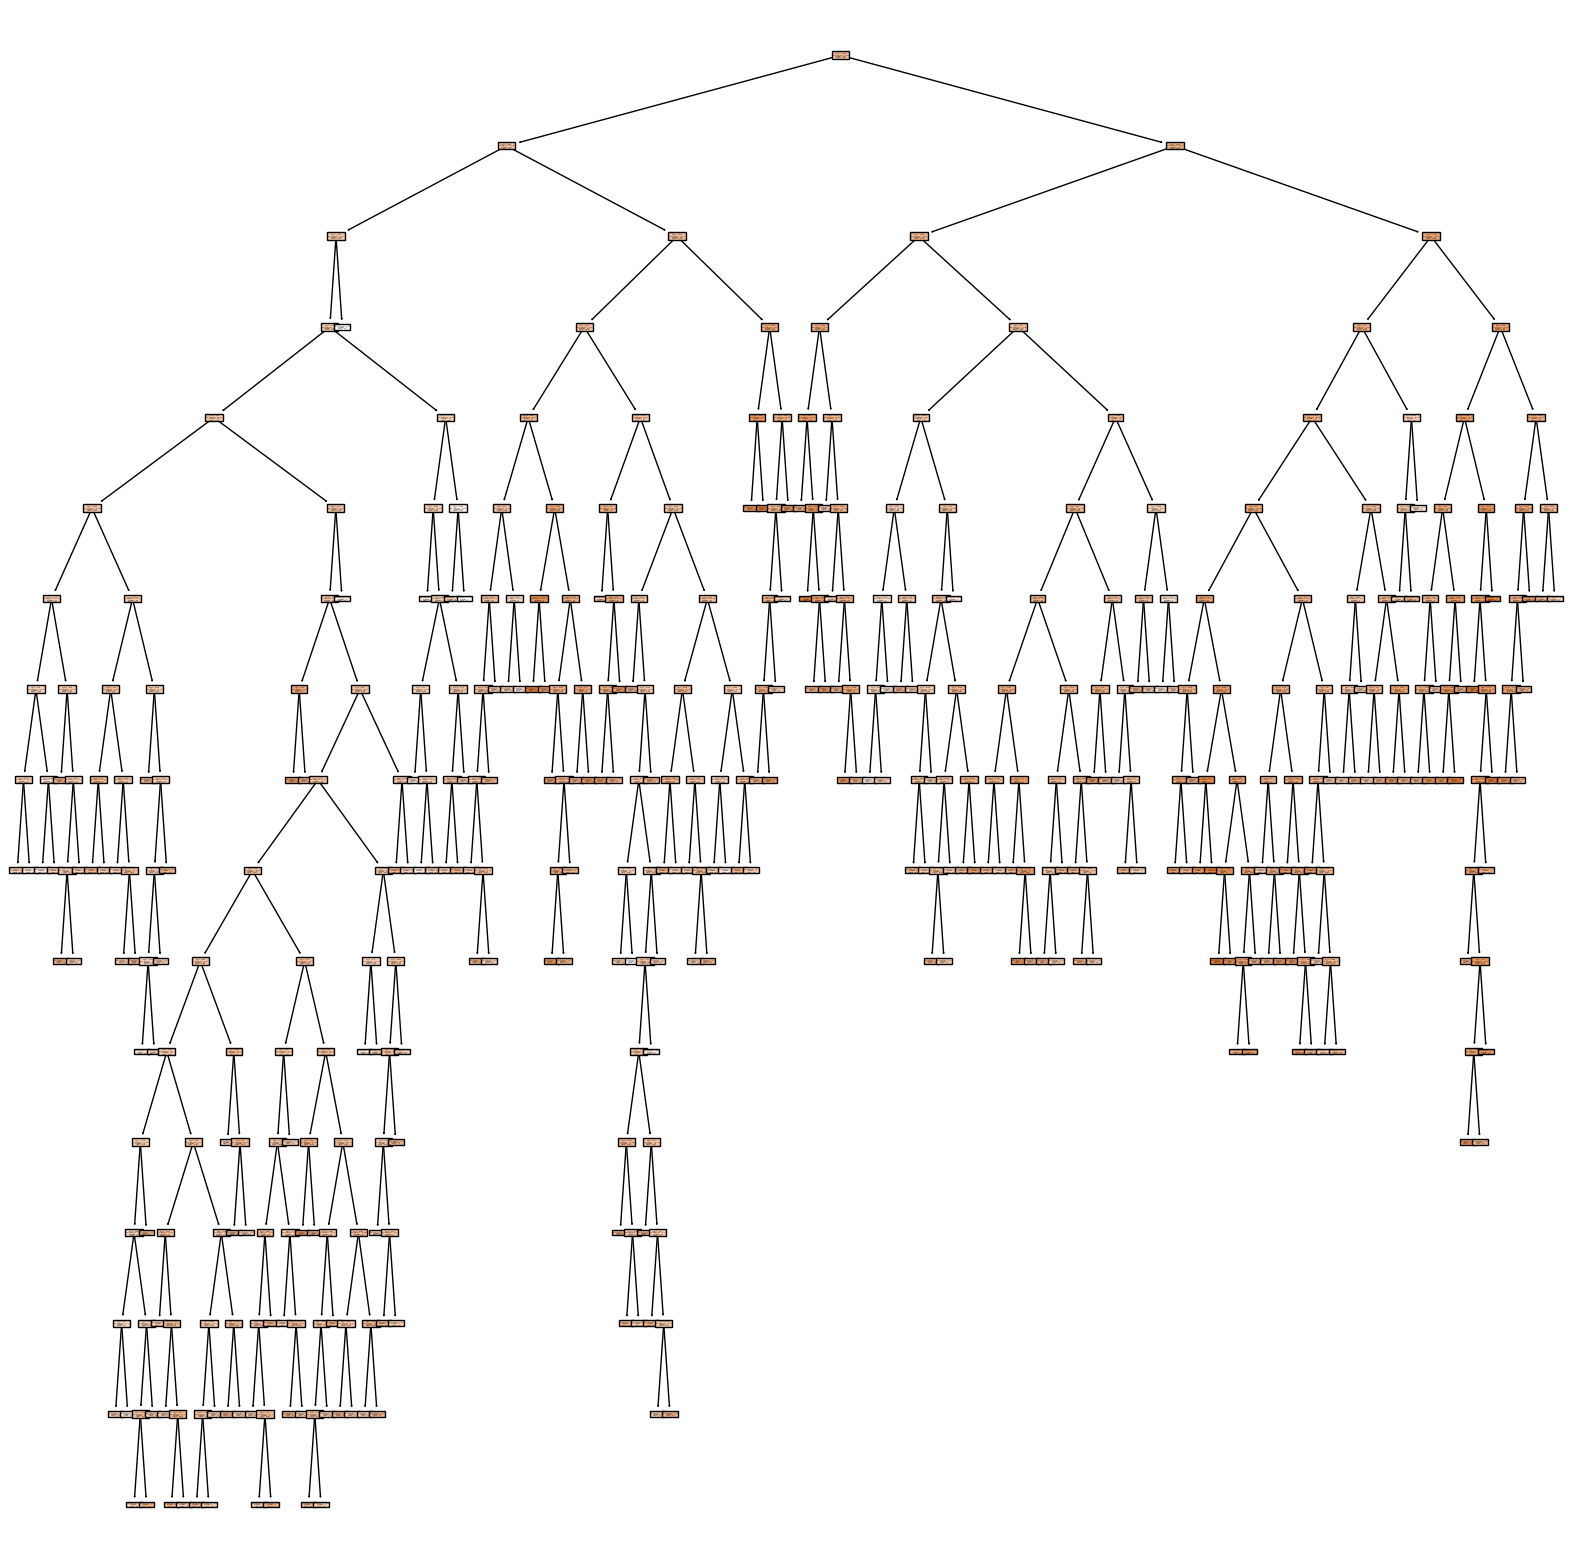

In [37]:
from sklearn import tree
plt.figure(figsize=(20,20))
tree.plot_tree(model, filled=True)

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [43]:
svm_regressor = SVR(kernel='linear', C=1.3)
svm_regressor.fit(X_train, y_train)

SVR(C=1.3, kernel='linear')

In [44]:
y_pred = svm_regressor.predict(X_test)

In [45]:
svm_mse = mean_squared_error(y_test, y_pred)
svm_r2 = r2_score(y_test, y_pred)

In [46]:
svm_mse

0.43875990049523583

In [47]:
models = ['Lasso Regression', 'Ridge Regression', 'SVM Regressor', 'Decision Tree Regressor']
mse_scores = [lasso_mse, ridge_mse, svm_mse, dt_mse]
best_model_index = mse_scores.index(min(mse_scores))
best_model_name = models[best_model_index]
print(f"The best model based on MSE is: {best_model_name}")
print(f"MSE of the best model: {min(mse_scores)}")

The best model based on MSE is: Ridge Regression
MSE of the best model: 0.3954060705306841
